In [1]:
%load_ext autoreload
%autoreload 2
from pytree import *
from test import *
import random
import matplotlib.pyplot as plt
print(__version__)

6588d53


In [2]:
def add_normal_noise(dataset, sigma):
    return [(d[0], d[1] + random.gauss(0, sigma)) for d in dataset]

def plot_dataset(data, hline=None, epsilon=None, reg=None):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    plt.figure(figsize=(20,20))
    plt.subplot(2,1,1)
    plt.plot(x, y, 'o', color='blue')
    if hline:
        plt.axhline(y=hline, color='red', linestyle='-')
        if epsilon:
            plt.axhline(y=hline-epsilon, color='red', linestyle='-')
            plt.axhline(y=hline+epsilon, color='red', linestyle='-')  
    if reg:
        new_y = [reg.predict(d[0]) for d in sorted(dataset)]
        new_x = [d[0] for d in sorted(dataset)]
        plt.plot(new_x, new_y, '-', color='red')
    axes = plt.gca()
    axes.set_ylim(0)
    plt.show()

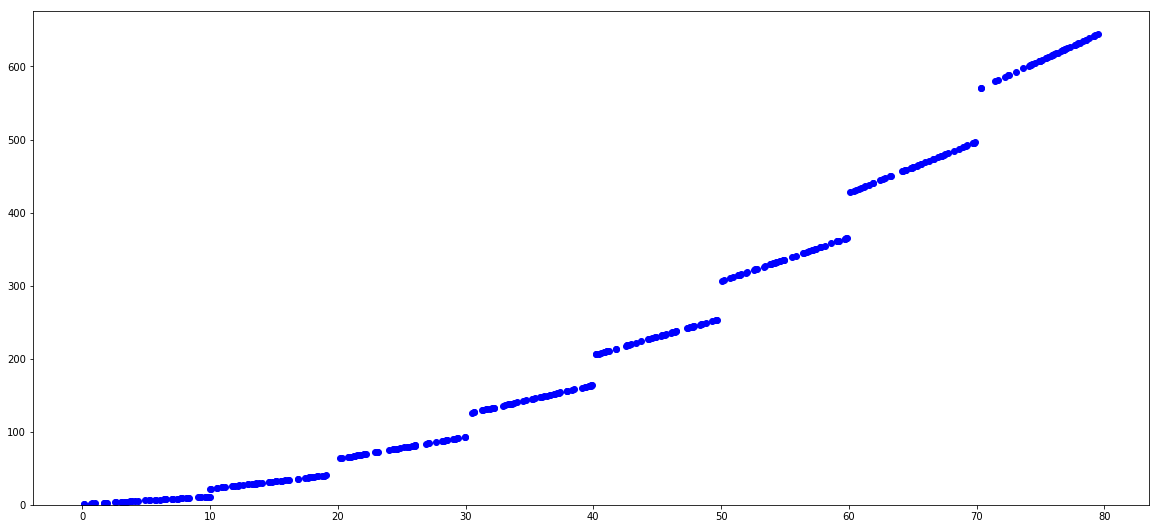

In [3]:
random.seed(27)
all_datasets = [generate_dataset(intercept=i, coeff=i, size=50, min_x=(i-1)*10, max_x=i*10, cls=float) for i in range(1, 9)]
dataset = sum(all_datasets, [])
plot_dataset(dataset)

# Float

8


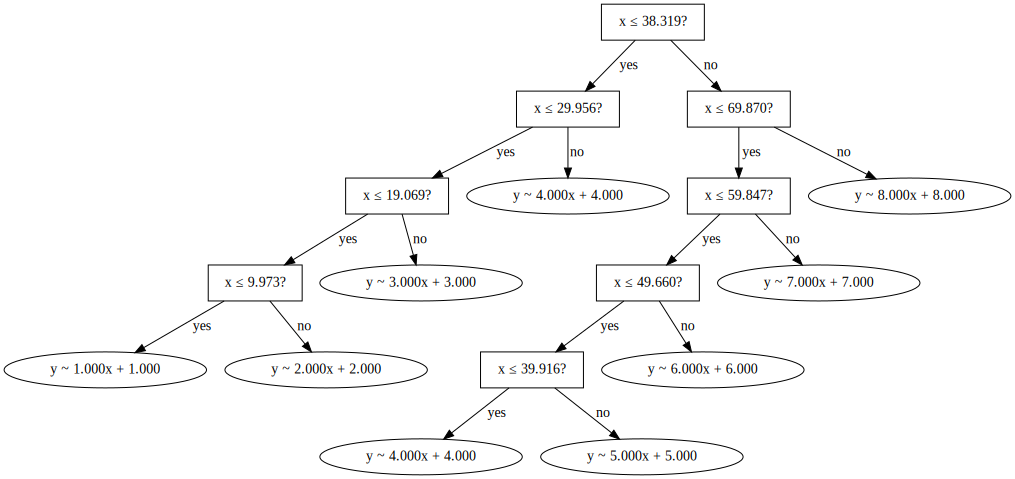

In [4]:
reg = compute_regression(dataset)
print(len(reg.breakpoints))
reg.to_graphviz()

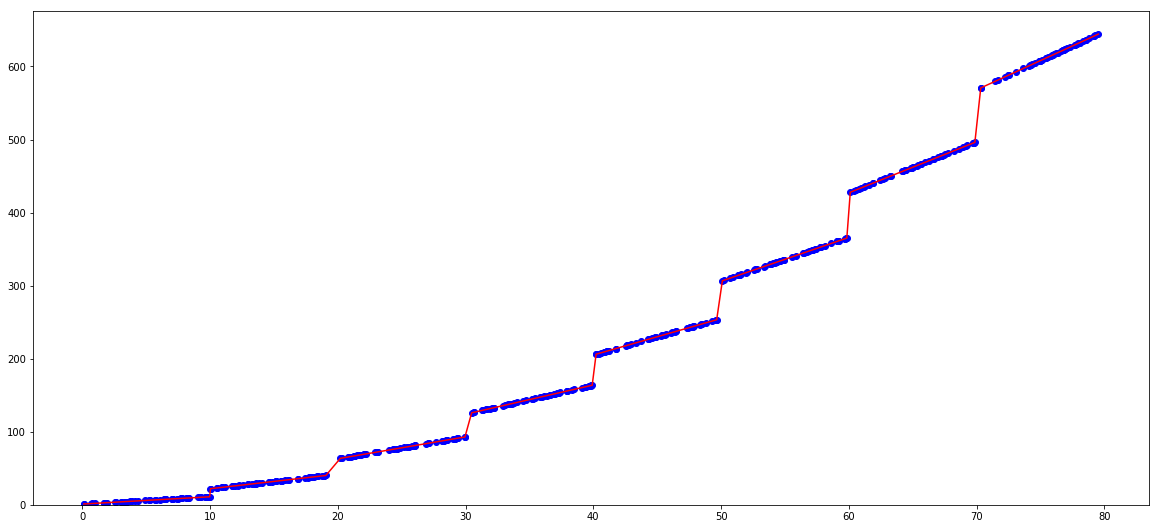

In [5]:
plot_dataset(dataset, reg=reg)

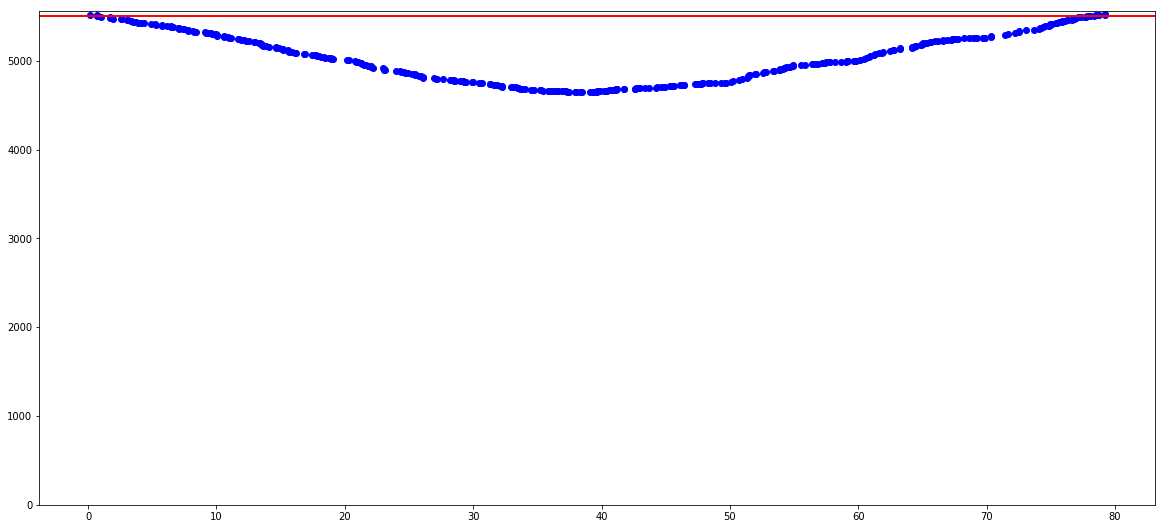

In [6]:
plot_dataset(reg.errors.split, reg.errors.nosplit, epsilon=reg.config.epsilon)

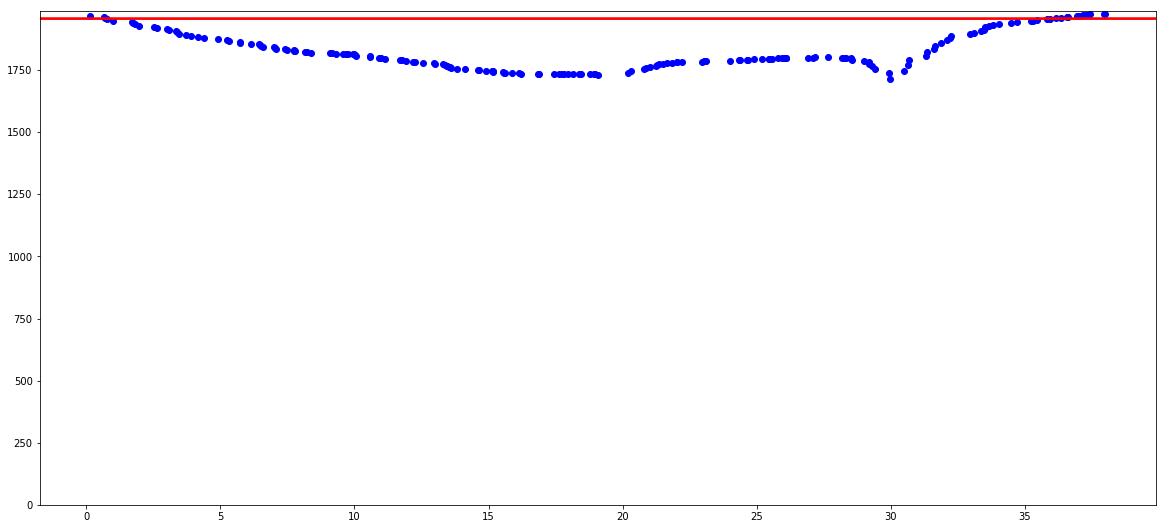

In [7]:
plot_dataset(reg.left.errors.split, reg.left.errors.nosplit, epsilon=reg.config.epsilon)